Importando bibliotecas

In [1]:
import pickle
import pathlib

import numpy as np
import pandas as pd

#### Carregando base de dados com a feature engineering 

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\livia\OneDrive\Área de Trabalho\inspe\4_semestre\ml\projeto\ames\data


In [3]:
clean_data_path = DATA_DIR / 'processed' / 'ames_minha1.pkl'

In [4]:
with open('../data/processed/ames_minha1.pkl', 'rb') as file:
    data = pickle.load(file)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2724 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MS.SubClass      2724 non-null   category
 1   MS.Zoning        2724 non-null   category
 2   Lot.Frontage     2724 non-null   float64 
 3   Lot.Area         2724 non-null   float64 
 4   Lot.Shape        2724 non-null   category
 5   Land.Contour     2724 non-null   category
 6   Lot.Config       2724 non-null   category
 7   Land.Slope       2724 non-null   category
 8   Neighborhood     2724 non-null   category
 9   Bldg.Type        2724 non-null   category
 10  House.Style      2724 non-null   category
 11  Overall.Qual     2724 non-null   category
 12  Overall.Cond     2724 non-null   category
 13  Year.Built       2724 non-null   float64 
 14  Roof.Style       2724 non-null   category
 15  Mas.Vnr.Type     2724 non-null   category
 16  Mas.Vnr.Area     2724 non-null   float64 
 17  

In [5]:
model_data = data.copy()

## Transformando todas as colunas em numéricas

In [6]:
categorical_columns = []
ordinal_columns = []
for col in model_data.select_dtypes('category').columns:
    if model_data[col].cat.ordered:
        ordinal_columns.append(col)
    else:
        categorical_columns.append(col)

### Colunas ordinais


In [7]:
for col in ordinal_columns:
    codes, _ = pd.factorize(data[col], sort=True)
    model_data[col] = codes

### Colunas categóricas

In [8]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()

aux_dataframe.head().transpose()

,0,1,2,3,4
AsbShng,False,False,False,False,False
BrkFace,True,False,False,True,False
CemntBd,False,False,False,False,False
HdBoard,False,False,False,False,False
MetalSd,False,False,False,False,False
Plywood,False,False,False,False,False
Stucco,False,False,False,False,False
VinylSd,False,True,False,False,True
Wd Sdng,False,False,True,False,False
WdShing,False,False,False,False,False


In [9]:
original_data = model_data['Exterior']
encoded_data = pd.get_dummies(original_data, drop_first=True)

aux_dataframe = encoded_data
aux_dataframe['Exterior'] = original_data.copy()

aux_dataframe.head().transpose()

,0,1,2,3,4
BrkFace,True,False,False,True,False
CemntBd,False,False,False,False,False
HdBoard,False,False,False,False,False
MetalSd,False,False,False,False,False
Plywood,False,False,False,False,False
Stucco,False,False,False,False,False
VinylSd,False,True,False,False,True
Wd Sdng,False,False,True,False,False
WdShing,False,False,False,False,False
Other,False,False,False,False,False


#### Transformação feita com one-hot enconding, retirando a primeira coluna

In [10]:
model_data = pd.get_dummies(model_data, drop_first=True)

In [11]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2724 entries, 0 to 2929
Columns: 173 entries, Lot.Frontage to Exterior_Other
dtypes: bool(117), float64(42), int64(14)
memory usage: 1.5 MB


**Quais colunas foram criadas a partir de cada uma das colunas categóricas**

In [12]:
for cat in categorical_columns:
    dummies = []
    for col in model_data.columns:
        if col.startswith(cat + "_"):
            dummies.append(f'"{col}"')
    dummies_str = ', '.join(dummies)
    print(f'From column "{cat}" we made {dummies_str}\n')

From column "MS.SubClass" we made "MS.SubClass_30", "MS.SubClass_50", "MS.SubClass_60", "MS.SubClass_70", "MS.SubClass_80", "MS.SubClass_85", "MS.SubClass_90", "MS.SubClass_120", "MS.SubClass_160", "MS.SubClass_190", "MS.SubClass_Other"

From column "MS.Zoning" we made "MS.Zoning_RH", "MS.Zoning_RL", "MS.Zoning_RM"

From column "Land.Contour" we made "Land.Contour_HLS", "Land.Contour_Low", "Land.Contour_Lvl"

From column "Lot.Config" we made "Lot.Config_CulDSac", "Lot.Config_FR2", "Lot.Config_FR3", "Lot.Config_Inside"

From column "Neighborhood" we made "Neighborhood_BrDale", "Neighborhood_BrkSide", "Neighborhood_ClearCr", "Neighborhood_CollgCr", "Neighborhood_Crawfor", "Neighborhood_Edwards", "Neighborhood_Gilbert", "Neighborhood_IDOTRR", "Neighborhood_MeadowV", "Neighborhood_Mitchel", "Neighborhood_NAmes", "Neighborhood_NPkVill", "Neighborhood_NWAmes", "Neighborhood_NoRidge", "Neighborhood_NridgHt", "Neighborhood_OldTown", "Neighborhood_SWISU", "Neighborhood_Sawyer", "Neighborhood_Sa

## Separação dos dados de trenainamento e teste

In [13]:
X = model_data.drop(columns=['SalePrice']).copy()
y = model_data['SalePrice'].copy()

In [14]:
X.values, y.values

(array([[141.0, 31770.0, 1, ..., False, False, False],
        [80.0, 11622.0, 0, ..., False, False, False],
        [81.0, 14267.0, 1, ..., True, False, False],
        ...,
        [68.0, 8885.0, 1, ..., False, False, False],
        [77.0, 10010.0, 0, ..., False, False, False],
        [74.0, 9627.0, 0, ..., False, False, False]], dtype=object),
 array([5.33243846, 5.0211893 , 5.23552845, ..., 5.1172713 , 5.23044892,
        5.27415785]))

In [15]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42  # Any number here, really.
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=RANDOM_SEED,
)

## Treinando modelos para encontrar os melhores hiperparâmetros

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Rigde

In [17]:
# gs_ridge = GridSearchCV( estimator = Ridge(random_state=RANDOM_SEED),
#                             param_grid = {
#                                 'alpha': np.logspace(-3, 3, 7),
#                                 'fit_intercept': [True, False],
#                                 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
#                                 'tol': [1e-3, 1e-4, 1e-5],

#                                           },
#                             cv = 5,
#                             n_jobs = -1)

# gs_ridge.fit(Xtrain, ytrain)
# print(gs_ridge.best_params_)

{'alpha': 10.0, 'fit_intercept': True, 'solver': 'svd', 'tol': 0.001}

### Lasso

In [18]:
# gs_lasso = GridSearchCV( estimator = Lasso(random_state=RANDOM_SEED),
#                             param_grid = {
#                                     'alpha': [0.00001, 0.0001, 0.001, 0.01],
#                                     'fit_intercept': [True, False],
#                                     'max_iter': [250,500, 1000, 5000, 10000,100000]
#                                           },
#                             cv = 5,
#                             n_jobs = -1)

# gs_lasso.fit(Xtrain, ytrain)
# print(gs_lasso.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 100000}

### Gradient Boosting

In [19]:
# gs_gradient_booting = GridSearchCV( estimator = GradientBoostingRegressor(random_state=RANDOM_SEED),
#                             param_grid = {'n_estimators': [500, 1000, 2000],
#                                           'max_depth': [1, 2, 3, 4],
#                                           'learning_rate': [0.1, 0.01, 0.001],
#                                           },
#                             cv = 5,
#                             n_jobs = -1)

# gs_gradient_booting.fit(Xtrain, ytrain)
# print(gs_gradient_booting.best_params_)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 2000}

### Random Forest Regressor

In [20]:

# gs_random = GridSearchCV( estimator = RandomForestRegressor(random_state=RANDOM_SEED),
#                             param_grid = {
#                                 'n_estimators': [500, 1000, 2000],
#                                 'max_depth': [1, 2, 3, 4],
#                                           },
#                             cv = 5,
#                             n_jobs = -1)

# gs_random.fit(Xtrain, ytrain)
# print(gs_random.best_params_)

{'max_depth': 4, 'n_estimators': 2000}

## Comparando os modelos com validação cruzada

### Sem treinamento dos hiperparâmetros

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(random_state=RANDOM_SEED),
    "Lasso": Lasso(random_state=RANDOM_SEED),
    "Gradient Boosting": GradientBoostingRegressor(random_state=RANDOM_SEED),
    "Random Forest": RandomForestRegressor(random_state=RANDOM_SEED)
}

def erro_percentual(score):
    return 100 * (10**np.sqrt(-score) - 1)

model_scores_plain = {}

for model_name, model in models.items():
    # Criando o pipeline com normalização e o modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('model', model)
    ])


    # Validação Cruzada
    scores = cross_val_score(pipeline, Xtrain, ytrain, 
                                    scoring="neg_mean_squared_error", cv=8, n_jobs=-1)
    
    model_scores_plain[model_name] = scores
    

    # Calculando o erro percentual
    error_percent_min = erro_percentual(scores.max())
    error_percent_max = erro_percentual(scores.min())
    error_percent_mean = erro_percentual(scores.mean())

    
    # Imprimindo o resultado
    print(f'Model: {model_name} - Error: min {error_percent_min:.2f}%, max {error_percent_max:.2f}%  => Mean Error {error_percent_mean:.2f})')


C:\Users\livia\AppData\Local\Temp\ipykernel_2488\3749958832.py:10: RuntimeWarning: overflow encountered in scalar power
  return 100 * (10**np.sqrt(-score) - 1)


Model: Linear Regression - Error: min 8.51%, max inf%  => Mean Error inf)
Model: Ridge - Error: min 8.50%, max 14.85%  => Mean Error 11.29)
Model: Lasso - Error: min 43.22%, max 51.63%  => Mean Error 47.55)
Model: Gradient Boosting - Error: min 8.92%, max 16.51%  => Mean Error 12.25)
Model: Random Forest - Error: min 10.18%, max 17.18%  => Mean Error 13.53)


### Com treinamento dos hiperparâmetros

In [27]:
models_gs = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha= 10.0, fit_intercept= True, solver= 'svd', tol= 0.001, random_state=RANDOM_SEED),
    "Lasso": Lasso(alpha=0.00001, fit_intercept=True, max_iter=100000, random_state=RANDOM_SEED),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=2000, max_depth=4, learning_rate=0.1, random_state=RANDOM_SEED),
    "Random Forest": RandomForestRegressor(random_state=RANDOM_SEED, n_estimators=2000, max_depth=4)
}

def erro_percentual(score):
    return 100 * (10**np.sqrt(-score) - 1)

model_scores = {}
pipelines = []

for model_name, model in models_gs.items():
    # Criando o pipeline com normalização e o modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ('model', model)
    ])

    pipelines.append(pipeline)


    # Validação Cruzada
    scores = cross_val_score(pipeline, Xtrain, ytrain, 
                                    scoring="neg_mean_squared_error", cv=8, n_jobs=-1)
    
    model_scores[model_name] = scores
    

    # Calculando o erro percentual
    error_percent_min = erro_percentual(scores.max())
    error_percent_max = erro_percentual(scores.min())
    error_percent_mean = erro_percentual(scores.mean())

    
    # Imprimindo o resultado
    print(f'Model: {model_name} - Error: min {error_percent_min:.2f}%, max {error_percent_max:.2f}%  => Mean Error {error_percent_mean:.2f}')

C:\Users\livia\AppData\Local\Temp\ipykernel_2488\23277567.py:10: RuntimeWarning: overflow encountered in scalar power
  return 100 * (10**np.sqrt(-score) - 1)


Model: Linear Regression - Error: min 8.51%, max inf%  => Mean Error inf)
Model: Ridge - Error: min 8.45%, max 14.86%  => Mean Error 1.1e+01)
Model: Lasso - Error: min 8.50%, max 14.87%  => Mean Error 1.1e+01)
Model: Gradient Boosting - Error: min 9.16%, max 15.46%  => Mean Error 1.2e+01)
Model: Random Forest - Error: min 13.18%, max 20.33%  => Mean Error 1.7e+01)


In [28]:
# código para gerar os modelos para a API

# import joblib

# model_names = ["linear_regression", "ridge", "lasso", "gradient_boosting", "random_forest"]

# for model_name, pipeline in zip(model_names, pipelines):
#     pipeline.fit(Xtrain, ytrain)
#     joblib.dump(pipeline, f"{model_name}.joblib")

In [29]:
comparativo = pd.DataFrame()
comparativo['Model'] = model_scores.keys()
with_grid_search = [erro_percentual(scores.mean()) for scores in model_scores.values()]
comparativo['With Grid Search'] = with_grid_search

without_grid_search = [erro_percentual(scores.mean()) for scores in model_scores_plain.values()]

comparativo['Without Grid Search'] = without_grid_search
comparativo.head()

C:\Users\livia\AppData\Local\Temp\ipykernel_2488\23277567.py:10: RuntimeWarning: overflow encountered in scalar power
  return 100 * (10**np.sqrt(-score) - 1)
C:\Users\livia\AppData\Local\Temp\ipykernel_2488\23277567.py:10: RuntimeWarning: overflow encountered in scalar power
  return 100 * (10**np.sqrt(-score) - 1)


,Model,With Grid Search,Without Grid Search
0,Linear Regression,inf,inf
1,Ridge,11.207555,11.293068
2,Lasso,11.293285,47.551068
3,Gradient Boosting,11.959402,12.249640
4,Random Forest,17.012160,13.531780


A partir desses resultados podemos chegar em algumas conclusões:

O treinamento dos hiperparâmetros diminui a taxa de erros do *Ridge*, o *Lasso* e o *Gradient Boosting*, porém a que foi mais siginificativa foi a diminuição de mais de 20% do *Lasso*. Já em relação ao *Random Forest*, houve um aumento na taxa de erro.

Vamos seguir as análises com o *Ridge*, o *Lasso* e o *Gradient Boosting*, posto que:
* A taxa de erro do linear regression em certo caso pode tender ao infinito, o que torna arriscado o uso desse modelo;
* A taxa de erro do Random Forest é consideravelmente maior que os demais;
* A taxa de erros entre os outros três modelos está dentro de uma faixa pequena de diferença, ou seja, é necessário realizar mais testes comparativos para selecionar o modelo final.

## Teste de hipótese

**Pergunta:**  "Será que o desempenho médio (ou seja, $\overline{\text{RMSE}}$) de algum dos modelos é superior ao desempenho médio dos demais modelos de regressão?"

Para os seguintes teste, vamos adotar um nível de significância $\alpha$ de $0.01$ ($1 \%$) e nomear as médias populacionais do RSME de cada um dos modelos como $\mu_{\text{R}}$ (Ridge), $\mu_{\text{L}}$ (Lasso) e $\mu_{\text{GB}}$ (Gradient Boosting)

### Teste U de Mann-Whitney



In [30]:
from scipy.stats import mannwhitneyu
def rmse_score(score): return np.sqrt(-score)

#### Ridge vs Lasso

*Teste #1*: Comparar *Ridge* com *Lasso*.

*Hipótese nula* $H_0$: $\mu_{\text{R}} = \mu_{\text{L}}$

*Hipótese alternativa* $H_1$: $\mu_{\text{R}} \neq \mu_{\text{L}}$

In [31]:
U, pvalue = mannwhitneyu(rmse_score(model_scores['Ridge']), rmse_score(model_scores['Lasso']))
print("p-value: {0}".format(pvalue))


p-value: 0.5053613053613053


#### Ridge vs Gradient Boosting


*Teste #2*: Comparar *Ridge* com *Gradient Boosting*.

*Hipótese nula* $H_0$: $\mu_{\text{R}} = \mu_{\text{GB}}$

*Hipótese alternativa* $H_1$: $\mu_{\text{R}} \neq \mu_{\text{GB}}$

In [32]:
U, pvalue = mannwhitneyu(rmse_score(model_scores['Ridge']), rmse_score(model_scores['Gradient Boosting']))
print("p-value: {0}".format(pvalue))

p-value: 0.1605283605283605


#### Lasso vs Gradient Boosting


*Teste #3*: Comparar *Lasso* com *Gradient Boosting*.

*Hipótese nula* $H_0$: $\mu_{\text{L}} = \mu_{\text{GB}}$

*Hipótese alternativa* $H_1$: $\mu_{\text{L}} \neq \mu_{\text{GB}}$

In [33]:
U, pvalue = mannwhitneyu(rmse_score(model_scores['Lasso']), rmse_score(model_scores['Gradient Boosting']))
print("p-value: {0}".format(pvalue))

p-value: 0.1605283605283605


Como nenhum dos p-valores dos testes realizados teve um valor maior do que $\alpha=0.01$, então não podemos refutar a hipótese nula de que seus desempenhos são iguais. Desse modo, pode-se concluir que não há um nível de diferença entre os modelos grande o suficiente para que seja aparente no teste de hipótese realizado

## Avaliação final de desempenho

Como não foi possível encontrar uma diferença significativa entre os três modelos, vamos treinar ambos com o conjunto total de treino e calcular a taxa de erro com o conjunto de teste.

In [34]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)



final_ridge = Ridge(alpha= 10.0, fit_intercept= True, solver= 'svd', tol= 0.001, random_state=RANDOM_SEED)
final_lasso = Lasso(alpha=0.00001, fit_intercept=True, max_iter=100000, random_state=RANDOM_SEED)
final_gradient_boosting = GradientBoostingRegressor(n_estimators=2000, max_depth=4, learning_rate=0.1, random_state=RANDOM_SEED)

finals = {
    'Ridge': final_ridge, 
    'Lasso': final_lasso, 
    'Gradient Boosting': final_gradient_boosting
    }

for nome, m in finals.items():
    # Ajustando o modelo
    m.fit(Xtrain, ytrain)

    # Fazendo previsões
    ypred = m.predict(Xtest)

    # Calculando o RMSE
    RMSE = np.sqrt(mean_squared_error(ytest, ypred))

    # Calculando o erro percentual
    error_percent = 100 * (10**RMSE - 1)

    # Imprimindo o resultado
    print(f'Modelo: {nome} -> Erro médio: {error_percent:.5f}%')

Modelo: Ridge -> Erro médio: 9.97618%
Modelo: Lasso -> Erro médio: 9.98422%
Modelo: Gradient Boosting -> Erro médio: 10.84616%


A diferença entre os modelos segue sendo muito baixa, além de que mesmo que o Ridge possua a menor taxa de erro com o conjunto de teste não siginifica necessarimente que o seu desempenho é melhor que os dos demais modelos em todas as situações, já que aqui apenas foi testado com um conjunto limitado de dados. Para a continuação de nossa análise, vamos adotar o Rigde como o modelo final.

In [35]:
final_model = finals['Ridge']

## Importância das features

In [36]:
# lista de features
attributes = list(X.columns) 

# lista os pesos de cada uma das features de acordo com o modelo final
feature_importances = final_model.coef_ 

# ordena as features de acordo com o valor absoluto do peso e seleciona as 10 primeiras
top_10 = sorted(zip(feature_importances, attributes), key=lambda x: abs(x[0]), reverse=True)[:10]

# {nome da feature: peso da feature}
ranking = {top_10[i][1]: top_10[i][0] for i in range(len(top_10))}
top_10

[(0.02785072220901843, 'Overall.Qual'),
 (0.02269282415420515, 'TotalSFLog'),
 (0.019703489161962618, 'Overall.Cond'),
 (0.018721398803690753, 'Gr.Liv.Area'),
 (0.012624178205388312, 'Sale.Condition_Normal'),
 (-0.01239247813396684, 'House.Age'),
 (0.012333385214885556, 'Year.Built'),
 (0.01208925873637279, 'Exterior_VinylSd'),
 (0.01126149527593662, 'X1st.Flr.SF'),
 (0.011161712895193365, 'X2nd.Flr.SF')]

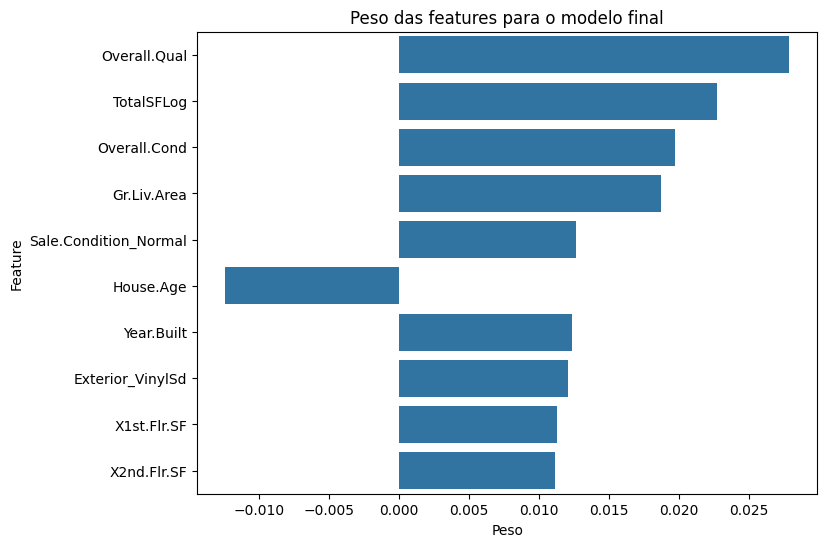

In [37]:
# fonte: https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,6))

sns.barplot(x=ranking.values(), y=ranking.keys())

plt.title('Peso das features para o modelo final')
plt.xlabel('Peso')
plt.ylabel('Feature')
plt.show()

O gráfico acima representa as 10 features que com maior peso no modelo final. Seu peso para o modelo representa a importância que esssas features possuem na determinação do preço do imóvel. Essa importância pode significar diferentes tipos relações com o preço do imóvel.

Por exemplo, pode-se notar pelo gráfico abaixo que a Overall.Qual está diretamente relacionada com o preço do imóvel, posto que quanto maior a sua nota de qualidade, maior o preço.



<Figure size 640x480 with 0 Axes>

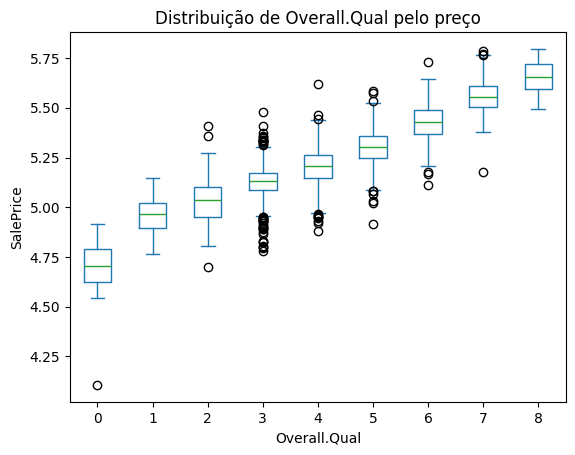

In [38]:
plt.figure()
aux_dataframe = model_data[['Overall.Qual', 'SalePrice']]
aux_dataframe.plot.box(by='Overall.Qual')
plt.title('Distribuição de Overall.Qual pelo preço')
plt.xlabel('Overall.Qual')
plt.ylabel('SalePrice')
plt.show()

## Treinamento final

Treinamento do modelo com o conjunto completo de dados

In [39]:
final_model.fit(X, y)

Ridge(alpha=10.0, random_state=42, solver='svd', tol=0.001)

## Conclusão

É possível afirmar que o modelo final desenvolvido nesse projeto pode ser utilizado para estimar o preço de casas em Ames, assim servindo de base para serviços do setor imobiliário dessa cidade. Entretanto, o uso desse modelo em um sistema de produção deve ser com consciência da taxa de erro de cerca de 10%. Portanto, pode-se utilizar as previsões desse modelo como um direcionamento do valor do imóvel, assim ainda sendo necessário avaliar caso a caso com atenção.